<a href="https://www.kaggle.com/code/saibhossain/most-common-datamining-techniques?scriptVersionId=294957752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

#  1. Error detection and fixing

In [2]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    "A": [1, 2, np.nan, 4, 1000],  
    "B": [5, 6, 7, np.nan, 9]
})

print("Original data:\n", data)
data_filled = data.fillna(data.mean()) 

data_fixed = data_filled.clip(upper=100)
print("\nFixed data:\n", data_fixed)

Original data:
         A    B
0     1.0  5.0
1     2.0  6.0
2     NaN  7.0
3     4.0  NaN
4  1000.0  9.0

Fixed data:
        A     B
0    1.0  5.00
1    2.0  6.00
2  100.0  7.00
3    4.0  6.75
4  100.0  9.00


# 2. Noise / Outlier detection (Z-score method)

In [3]:
z_scores = (data_fixed - data_fixed.mean()) / data_fixed.std()
outliers = np.abs(z_scores) > 2
print("\nOutliers detected:\n", outliers)


Outliers detected:
        A      B
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False


# 3. Linear Regression

In [4]:
from sklearn.datasets import make_regression, make_classification, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression

X, y = make_regression(n_samples=100, n_features=1, noise=10)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("\nLinear Regression coef:", lin_reg.coef_, "intercept:", lin_reg.intercept_)


Linear Regression coef: [47.75278311] intercept: 0.4616143306257605


In [1]:
X = [1,2,3,4,5]
Y = [2,4,5,4,5]

mx = sum(X)/len(X)
my = sum(Y)/len(Y)

num = sum((x-mx)*(y-my) for x,y in zip(X,Y))
den = sum((x-mx)**2 for x in X)

b = num/den
a = my - b*mx

print("Linear model: y =", a, "+", b, "*x")

Linear model: y = 2.2 + 0.6 *x


#  4. Multiple Linear Regression

In [5]:
X2, y2 = make_regression(n_samples=100, n_features=3, noise=5)
multi_reg = LinearRegression()
multi_reg.fit(X2, y2)
print("\nMultiple Regression coefs:", multi_reg.coef_)


Multiple Regression coefs: [84.20764678 58.92089907 38.69102432]


In [2]:
data = [(1,2,5),(2,1,6),(3,4,10),(4,3,12)]  # (x1,x2,y)

w0=w1=w2=0
lr=0.01

for _ in range(1000):
    for x1,x2,y in data:
        y_pred = w0 + w1*x1 + w2*x2
        err = y_pred - y
        w0 -= lr*err
        w1 -= lr*err*x1
        w2 -= lr*err*x2

print("Multiple LR weights:", w0,w1,w2)

Multiple LR weights: 1.3341443289359627 2.1507480322452692 0.6207716555632409


# 5. Polynomial (Non-linear) Regression

In [6]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
print("\nPolynomial Regression fitted.")
print("Intercept:", poly_reg.intercept_)
print("Coefficients:", poly_reg.coef_)


Polynomial Regression fitted.
Intercept: 0.14500050810981624
Coefficients: [ 0.         45.51315746  0.32306821  1.08249578]


In [3]:
X = [1,2,3,4]
Y = [1,4,9,16]

w0=w1=w2=0
lr=0.001

for _ in range(5000):
    for x,y in zip(X,Y):
        y_pred = w0 + w1*x + w2*x*x
        err = y_pred - y
        w0 -= lr*err
        w1 -= lr*err*x
        w2 -= lr*err*x*x

print("Polynomial model:", w0,w1,w2)

Polynomial model: -0.06462318515391688 0.05817589650309392 0.9891391397107897


# 6. Logistic Regression

In [7]:
Xc, yc = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    Xc, yc, test_size=0.2, random_state=42
)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("\nLogistic Regression accuracy:", log_reg.score(X_test, y_test))



Logistic Regression accuracy: 0.8


In [5]:
import random
import math

data = [(1,2,0),(2,3,0),(3,5,1),(4,6,1)] 

w0=w1=w2=0
lr=0.1

def sigmoid(z):
    return 1/(1+math.exp(-z))

for _ in range(2000):
    for x1,x2,y in data:
        z = w0 + w1*x1 + w2*x2
        y_pred = sigmoid(z)
        err = y_pred - y
        w0 -= lr*err
        w1 -= lr*err*x1
        w2 -= lr*err*x2

print("Logistic weights:", w0,w1,w2)

Logistic weights: -13.111479339124598 -0.7573191219491958 3.8252731271795835


# 7. Decision Tree

In [8]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("\nDecision Tree accuracy:", tree.score(X_test, y_test))


Decision Tree accuracy: 0.8


In [6]:
data = [(2,0),(4,0),(6,1),(8,1)] 

best_thresh=0
best_acc=0

for t in range(1,10):
    correct=0
    for x,y in data:
        pred = 0 if x<t else 1
        if pred==y: correct+=1
    acc = correct/len(data)
    if acc>best_acc:
        best_acc=acc
        best_thresh=t

print("Best split at x <", best_thresh)

Best split at x < 5


# 8. Apriori Algorithm (simple)

In [9]:
transactions = [
    {'milk', 'bread', 'butter'},
    {'beer', 'bread'},
    {'milk', 'bread', 'beer', 'butter'},
    {'bread', 'butter'}
]

items = set().union(*transactions)
min_support = 2

freq_items = {}
for item in items:
    count = sum(1 for t in transactions if item in t)
    if count >= min_support:
        freq_items[item] = count

print("\nFrequent 1-itemsets:", freq_items)


Frequent 1-itemsets: {'milk': 2, 'beer': 2, 'butter': 3, 'bread': 4}


In [8]:
from collections import Counter, defaultdict

transactions = [
    {'milk','bread'},
    {'bread','butter'},
    {'milk','bread','butter'}
]

min_support=2
count=Counter()

for t in transactions:
    for item in t:
        count[item]+=1

freq = {i:c for i,c in count.items() if c>=min_support}
print("Frequent items:", freq)

Frequent items: {'bread': 3, 'milk': 2, 'butter': 2}


# 9. Evaluation metrics


Confusion Matrix:
 [[14  5]
 [ 3 18]]

Precision: 0.782608695652174 
Recall: 0.8571428571428571 
F1: 0.8181818181818182 
AUC: 0.894736842105263


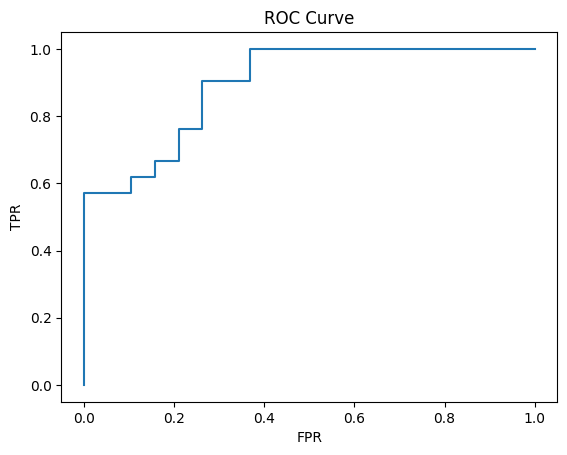

In [10]:
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("\nConfusion Matrix:\n", cm)
print("\nPrecision:", precision, "\nRecall:", recall, "\nF1:", f1, "\nAUC:", roc_auc)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [9]:
y_true=[1,0,1,1,0]
y_pred=[1,0,0,1,1]

TP=sum(1 for t,p in zip(y_true,y_pred) if t==p==1)
TN=sum(1 for t,p in zip(y_true,y_pred) if t==p==0)
FP=sum(1 for t,p in zip(y_true,y_pred) if t==0 and p==1)
FN=sum(1 for t,p in zip(y_true,y_pred) if t==1 and p==0)

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1 = 2*precision*recall/(precision+recall)

print("Confusion:",TP,FP,FN,TN)
print("Precision:",precision,"Recall:",recall,"F1:",f1)

Confusion: 2 1 1 1
Precision: 0.6666666666666666 Recall: 0.6666666666666666 F1: 0.6666666666666666


# 10. K-Nearest Neighbor

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("\nKNN accuracy:", knn.score(X_test, y_test))


KNN accuracy: 0.8


# 11. K-Means Clustering

In [12]:
iris = load_iris()
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(iris.data)
print("\nKMeans cluster labels (first 10):", clusters[:10])


KMeans cluster labels (first 10): [1 1 1 1 1 1 1 1 1 1]


In [12]:
points=[(1,1),(1,2),(5,5),(6,6)]
c1=(1,1)
c2=(6,6)

for _ in range(5):
    g1=[]; g2=[]
    for p in points:
        if dist(p,c1)<dist(p,c2): g1.append(p)
        else: g2.append(p)
    c1=(sum(x for x,_ in g1)/len(g1),sum(y for _,y in g1)/len(g1))
    c2=(sum(x for x,_ in g2)/len(g2),sum(y for _,y in g2)/len(g2))

print("Centers:",c1,c2)

Centers: (1.0, 1.5) (5.5, 5.5)


# 12. Bayes Classification

In [13]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("\nNaive Bayes accuracy:", nb.score(X_test, y_test))


Naive Bayes accuracy: 0.775
